In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
import pickle

# Ignore the warning message
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load data
infile = open("dropout_prediction_data.pkl", "rb")
df = pickle.load(infile)
infile.close()

In [3]:
# group data by session
df_grouped = df.groupby("UebungsID").agg(
    {
        "ID": "count",
        "Erstloesung": "sum",
        "Schussel": "sum",
        "Erfolg": "sum",
        "Schwierigkeit": "mean",
        "ist_Schulzeit": "first",
        "MehrfachFalsch": "first",
        "vorher_abgebrochen": "first",
        "y": "first",
        "UserAttribut": "first",
        "Klassenstufe": "first",
        "Jahredabei": "first",
        "AnzahlAufgaben": "first",
        "Art__GK": "first",
        "Art__GR": "first",
        "Art__GZ": "first",
        "Art__K": "first",
        "Art__LB": "first",
        "HA__HA": "first",
        "HA__Self": "first",
        "HA__nt": "first",
        "HA__vt": "first",
        "HA__zt": "first",
        "Sex__m": "first",
        "Sex__w": "first",
        "Testposition__pruefung": "sum",
        "Testposition__training": "sum",
        "Testposition__version": "sum",
        "OrderNumber": "max",
        "steps": "max",
    }
)

df_grouped["Fehler"] = df_grouped["ID"] - df_grouped["Erfolg"]
df_grouped = df_grouped.reset_index()

# balance out dataset
df_grouped_1 = df_grouped[df_grouped.y == 1]
df_grouped_0 = df_grouped[df_grouped.y == 0]
df_grouped_1 = df_grouped_1.sample(n=100000)
df_grouped = df_grouped_1.append(df_grouped_0)
ids = df_grouped[["UebungsID"]]
df = pd.merge(df, ids, on="UebungsID")

In [6]:
# build pickle file for each matrix
df_1 = df.loc[df["OrderNumber"] == 1]
df_1.to_pickle("matrices_allsessions/matrix1.pkl")

n = list(range(2, 61))

for x in n:
    df_x = df.loc[df["OrderNumber"] < (x + 1)]
    df_x = df_x.groupby("UebungsID").agg(
        {
            "ID": "count",
            "Erstloesung": "sum",
            "Schussel": "sum",
            "Erfolg": "sum",
            "Schwierigkeit": "mean",
            "ist_Schulzeit": "first",
            "MehrfachFalsch": "first",
            "vorher_abgebrochen": "first",
            "y": "first",
            "UserAttribut": "first",
            "Fehler": "first",
            "Klassenstufe": "first",
            "Jahredabei": "first",
            "AnzahlAufgaben": "first",
            "Art__GK": "first",
            "Art__GR": "first",
            "Art__GZ": "first",
            "Art__K": "first",
            "Art__LB": "first",
            "HA__HA": "first",
            "HA__Self": "first",
            "HA__nt": "first",
            "HA__vt": "first",
            "HA__zt": "first",
            "Sex__m": "first",
            "Sex__w": "first",
            "Testposition__pruefung": "sum",
            "Testposition__training": "sum",
            "Testposition__version": "sum",
            "OrderNumber": "max",
            "steps": "max",
        }
    )

    df_x = df_x.loc[df_x["ID"] == x]
    path = "matrices_allsessions/matrix" + str(x) + ".pkl"
    df_x.to_pickle(path)

<AxesSubplot:xlabel='Sentence Number', ylabel='Count of Sentences'>

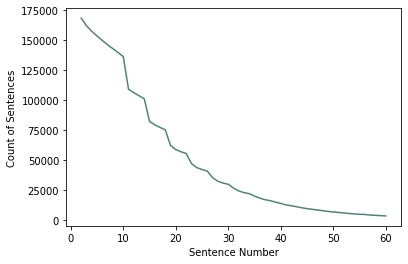

In [6]:
# plot count of matrics per n
n = list(range(2, 61))
sentence_len = pd.DataFrame(columns=["Sentence Number", "Count of Sentences"])

for x in n:
    path = "matrices_allsessions/matrix" + str(x) + ".pkl"
    infile = open(path, "rb")
    get_length = pickle.load(infile)
    infile.close()
    l = len(get_length)
    sentence_len = sentence_len.append(
        {"Sentence Number": x, "Count of Sentences": l}, ignore_index=True
    )

sentence_len["Sentence Number"] = sentence_len["Sentence Number"].astype("int")
sentence_len["Count of Sentences"] = sentence_len["Count of Sentences"].astype("int")
sns.lineplot(
    data=sentence_len, x="Sentence Number", y="Count of Sentences", color="#518177"
)